In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as mticker

warnings.filterwarnings('ignore')


In [2]:
import matplotlib.font_manager as font_manager

from matplotlib import rcParams
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

pathdata = '/Users/danielarisaro/Documents/Fundar/indice-mercado-trabajo-ingresos/'

# Fuente para los graficos
font_dir = [pathdata + 'basemaps/Archivo/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

rcParams['font.family'] = 'Archivo'


In [3]:

# Colores fundar
fundar_colores_primarios = ['#7BB5C4', '#9FC1AD', '#D3D3E0',  '#8d9bff', '#FF9750', '#FFD900',]
fundar_colores_secundarios = ['#B5E0EA', '#B3B3B3', '#848279', '#AFA36E', '#5D896F', '#9C9CBC', '#E27124']
fundar_white = '#F5F5F5'
fundar_black = '#151515'

In [4]:
file_path = '../data/raw/data_plots.xlsx'
xls = pd.ExcelFile(file_path)

sheet_names = xls.sheet_names


In [40]:
df_pesca_marina_paises = pd.read_excel(file_path, sheet_name=sheet_names[2])

df_2020 = df_pesca_marina_paises[['País o territorio', 'Porcentaje del total (2020)']].dropna()

df_cleaned = df_2020[~df_2020['País o territorio'].isin(['Perú (excluida la anchoveta)', 'Chile (excluida la anchoveta)'])]

df_cleaned['País o territorio'] = df_cleaned['País o territorio'].replace({
    'Perú (total)': 'Perú',
    'Chile (total)': 'Chile',
    'Estados Unidos de América': 'EEUU',
    'Federación de Rusia': 'Rusia', 
    'Viet Nam': 'Vietnam',
    'Irán (República Islámica del)': 'Irán'
})

df_filtered_2020_all = df_cleaned[~df_cleaned['País o territorio'].str.contains('Total mundial|Total de los 25 prod|Total del resto de los productores')]

df_top_20_filtered = df_filtered_2020_all.sort_values(by='Porcentaje del total (2020)', ascending=False).head(20)

print(sheet_names[2])


g01_pesca_marina_paises


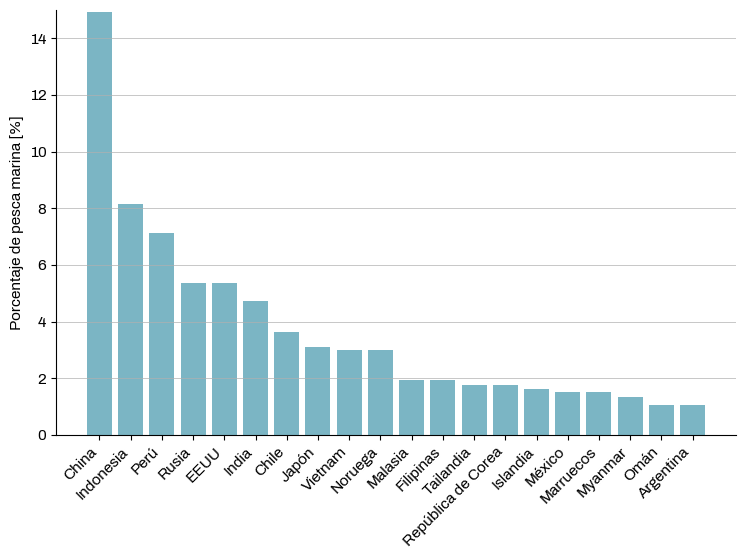

In [6]:
x_data = df_top_20_filtered['País o territorio']
y_data = df_top_20_filtered['Porcentaje del total (2020)']

fig01 = plt.figure(figsize=(8,5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.bar(x_data, y_data, color=fundar_colores_primarios[0])

ax.set_xticks(range(len(x_data)))
ax.set_xticklabels(x_data, rotation=45, ha='right');

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.grid(axis='y',
        lw=0.5)
ax.set_ylim([0, 15])

ax.tick_params(labelsize=11)
ax.set_ylabel('Porcentaje de pesca marina [%]', fontsize=11);

fig01.savefig('../figs/' + sheet_names[2] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig01.savefig('../figs/' + sheet_names[2] + '.svg', bbox_inches='tight', transparent=True, format='svg')


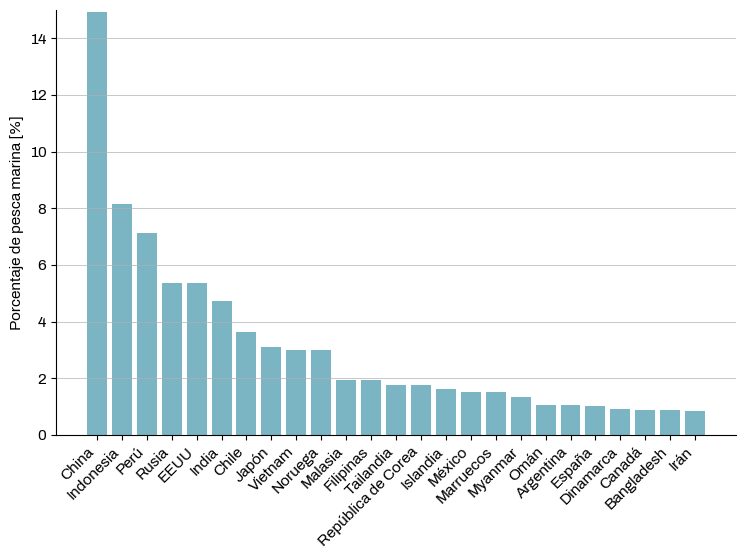

In [42]:
## grafico 1 version 2, con los 25 agregados
df_top_25_filtered = df_filtered_2020_all.sort_values(by='Porcentaje del total (2020)', ascending=False).head(25)

x_data = df_top_25_filtered['País o territorio']
y_data = df_top_25_filtered['Porcentaje del total (2020)']

fig01 = plt.figure(figsize=(8,5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.bar(x_data, y_data, color=fundar_colores_primarios[0])

ax.set_xticks(range(len(x_data)))
ax.set_xticklabels(x_data, rotation=45, ha='right');

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.grid(axis='y',
        lw=0.5)
ax.set_ylim([0, 15])

ax.tick_params(labelsize=11)
ax.set_ylabel('Porcentaje de pesca marina [%]', fontsize=11);

fig01.savefig('../figs/' + sheet_names[2] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig01.savefig('../figs/' + sheet_names[2] + 'v2.svg', bbox_inches='tight', transparent=True, format='svg')


In [38]:
df_top_25_filtered['País o territorio']

0                             China
1                         Indonesia
2                              Perú
4                             Rusia
5                              EEUU
6                             India
10                            Chile
8                             Japón
7                           Vietnam
9                           Noruega
14                          Malasia
12                        Filipinas
13                        Tailandia
15               República de Corea
18                         Islandia
17                           México
16                        Marruecos
19                          Myanmar
22                             Omán
20                        Argentina
21                           España
23                        Dinamarca
24                           Canadá
26                       Bangladesh
25    Irán (República Islámica del)
Name: País o territorio, dtype: object

In [7]:
df_pesca_mundial = pd.read_excel(file_path, sheet_name=sheet_names[4])
df_cleaned = df_pesca_mundial[['Año', 'Acuicultura', 'Pesca de captura', 'Total']].dropna()

print(sheet_names[4])


g02_evolucion_produccion_mundia


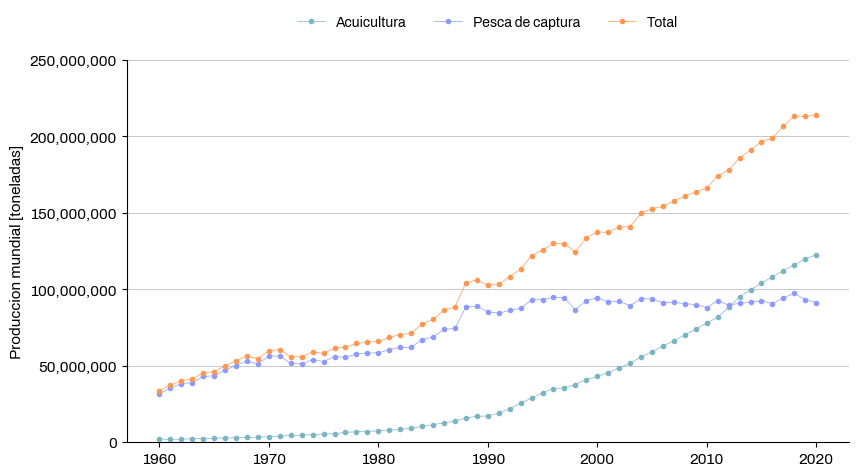

In [8]:
y_data_aq = df_cleaned['Acuicultura']
y_data_pesca = df_cleaned['Pesca de captura']
y_data_tot = df_cleaned['Total']

x_data = df_cleaned['Año']

fig02 = plt.figure(figsize=(8.5,4.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.plot(x_data, y_data_aq, color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, label='Acuicultura')
ax.plot(x_data, y_data_pesca, color=fundar_colores_primarios[3], marker='o', ms=3, lw=0.5, label='Pesca de captura')
ax.plot(x_data, y_data_tot, color=fundar_colores_primarios[4], marker='o', ms=3, lw=0.5, label='Total')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y',
        lw=0.5)
ax.set_ylim([0, 2.5e8])

ax.tick_params(labelsize=11)
ax.set_ylabel('Produccion mundial [toneladas]', fontsize=11);

ax.legend( 
        loc='upper center', 
        bbox_to_anchor=(0.5, 1.15), 
        frameon=False, 
        ncol=3)

fig02.savefig('../figs/' + sheet_names[4] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig02.savefig('../figs/' + sheet_names[4] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [9]:
df_exportaciones_sectores = pd.read_excel(file_path, sheet_name=sheet_names[5])
df_exportaciones_pesqueras = pd.read_excel(file_path, sheet_name=sheet_names[6], skiprows=1)
print(sheet_names[5])


g03_exportaciones_por_sectores_


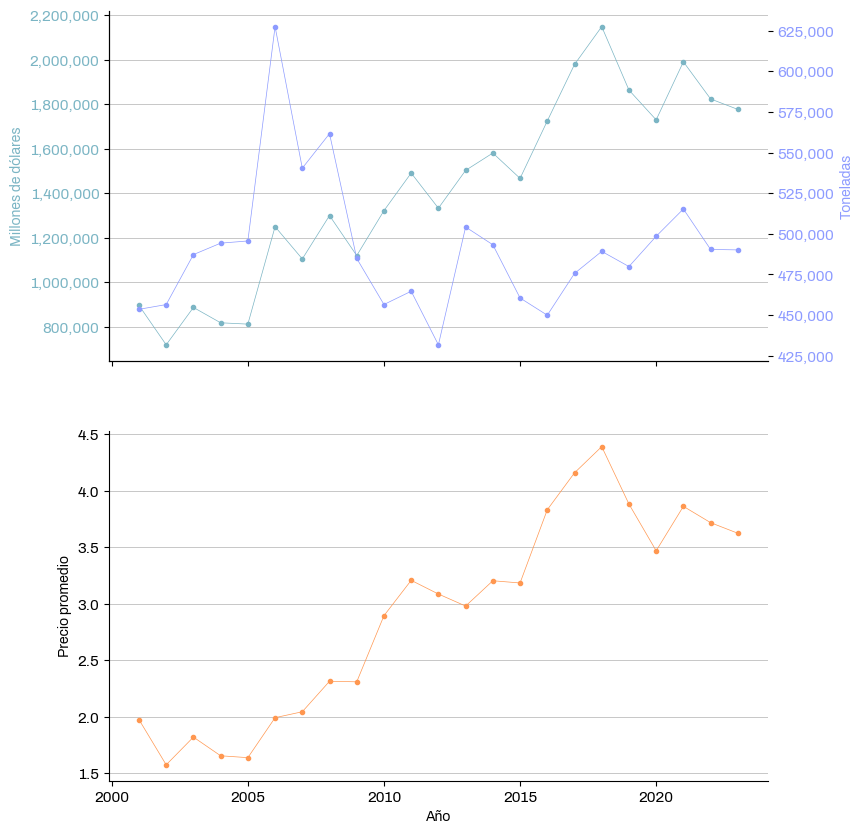

In [10]:

data = {
    'Year': list(range(2001, 2024)),
    'Millones de dolares': [895000, 718000, 886000, 817000, 811000, 1249000, 1104000, 1299000, 1119000, 1321000, 
                            1490000, 1332000, 1502000, 1580000, 1466000, 1724000, 1978000, 2148000, 1863000, 1729000, 
                            1990000, 1823000, 1776000],
    'Toneladas': [453515, 456431, 487183, 494220, 495580, 627469, 540367, 561601, 484816, 456471, 464630, 431668, 
                  504165, 493244, 460485, 449889, 475591, 489173, 479832, 498458, 515250, 490357, 490080],
    'Precio promedio': [1.973473865, 1.573074572, 1.818618466, 1.653109951, 1.636466363, 1.990536584, 2.043055923, 
                        2.313030069, 2.308092142, 2.893940688, 3.206852765, 3.085704755, 2.979183402, 3.203282757, 
                        3.1835999, 3.832056352, 4.15903581, 4.391084545, 3.882608913, 3.468697463, 3.862202814, 
                        3.717699554, 3.623898139]
}

df = pd.DataFrame(data)

fig03, (ax1, ax3) = plt.subplots(2, 1, figsize=(8.5, 10), sharex=True)

ax1.plot(df['Year'], df['Millones de dolares'], label='Millones de dólares', color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5)
ax1.set_ylabel('Millones de dólares', color=fundar_colores_primarios[0])
ax1.tick_params(axis='y', labelcolor=fundar_colores_primarios[0])
ax1.tick_params(labelsize=11)

ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Toneladas'], label='Toneladas', color=fundar_colores_primarios[3], marker='o', ms=3, lw=0.5)
ax2.set_ylabel('Toneladas', color=fundar_colores_primarios[3])
ax2.tick_params(axis='y', labelcolor=fundar_colores_primarios[3])
ax2.tick_params(labelsize=11)

ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax1.grid(axis='y', lw=0.5)

ax3.plot(df['Year'], df['Precio promedio'], label='Precio promedio', color=fundar_colores_primarios[4], marker='o', ms=3, lw=0.5)
ax3.set_ylabel('Precio promedio')
ax3.set_xlabel('Año')
ax3.tick_params(labelsize=11)
ax3.grid(axis='y', lw=0.5)

ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)

fig03.savefig('../figs/' + sheet_names[5] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig03.savefig('../figs/' + sheet_names[5] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [11]:
df_acuicola = pd.read_excel(file_path, sheet_name=sheet_names[7])
df_cleaned = df_acuicola[df_acuicola['Año']>=1970]
sheet_names[7]

'g04_produccion_acuicultura_arge'

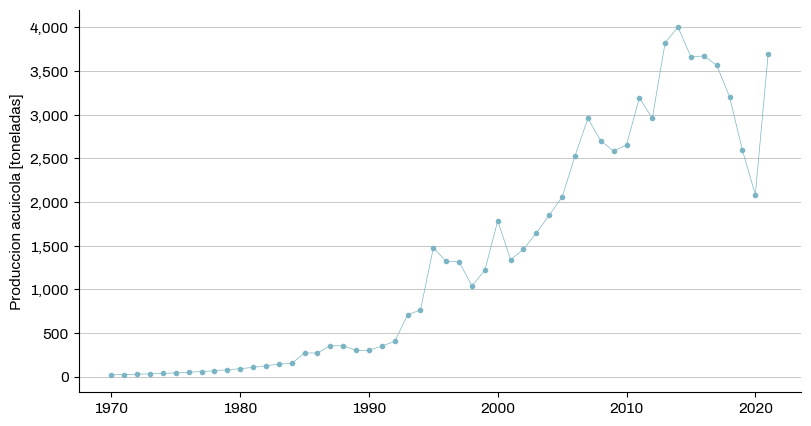

In [12]:
y_data_aq = df_cleaned['Producción acuicola']

x_data = df_cleaned['Año']

fig04 = plt.figure(figsize=(8.5,4.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.plot(x_data, y_data_aq, color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, label='Acuicultura')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y',
        lw=0.5)

ax.tick_params(labelsize=11)
ax.set_ylabel('Produccion acuicola [toneladas]', fontsize=11);

fig04.savefig('../figs/' + sheet_names[7] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig04.savefig('../figs/' + sheet_names[7] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [5]:
df_empleo = pd.read_excel(file_path, sheet_name=sheet_names[8])
sheet_names[8]

'g05_evolucion_empleo_registrado'

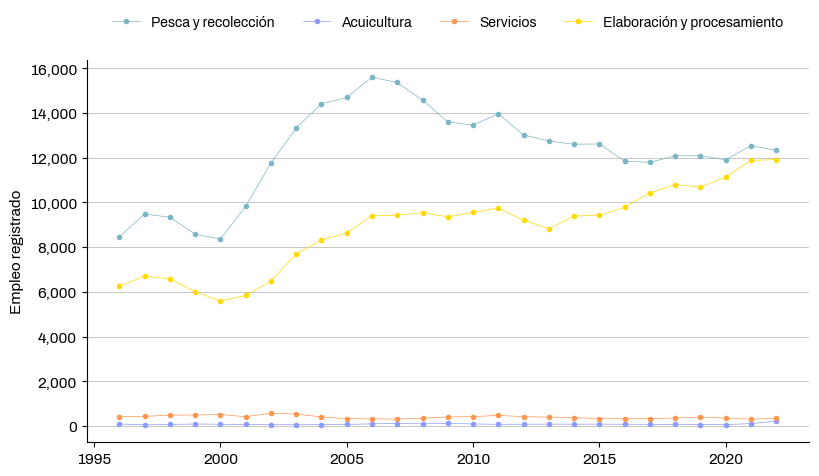

In [7]:
y_data_pesca_reco = df_empleo['Pesca y recolección']
y_data_aq = df_empleo['Acuicultura']
y_data_serv = df_empleo['Servicios']
y_data_elab = df_empleo['Elaboración']

x_data = df_empleo['Año']

fig05 = plt.figure(figsize=(8.5,4.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.plot(x_data, y_data_pesca_reco, color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, label='Pesca y recolección')
ax.plot(x_data, y_data_aq, color=fundar_colores_primarios[3], marker='o', ms=3, lw=0.5, label='Acuicultura')
ax.plot(x_data, y_data_serv, color=fundar_colores_primarios[4], marker='o', ms=3, lw=0.5, label='Servicios')
ax.plot(x_data, y_data_elab, color=fundar_colores_primarios[5], marker='o', ms=3, lw=0.5, label='Elaboración y procesamiento')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y',
        lw=0.5)
#ax.set_ylim([0, 2.5e8])

ax.tick_params(labelsize=11)
ax.set_ylabel('Empleo registrado', fontsize=11);

ax.legend( 
        loc='upper center', 
        bbox_to_anchor=(0.5, 1.15), 
        frameon=False, 
        ncol=4)

fig05.savefig('../figs/' + sheet_names[8] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig05.savefig('../figs/' + sheet_names[8] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [15]:
df_empleo_OEDE = pd.read_excel(file_path, sheet_name=sheet_names[9])
sheet_names[9]

'g06_empleo_OEDE'

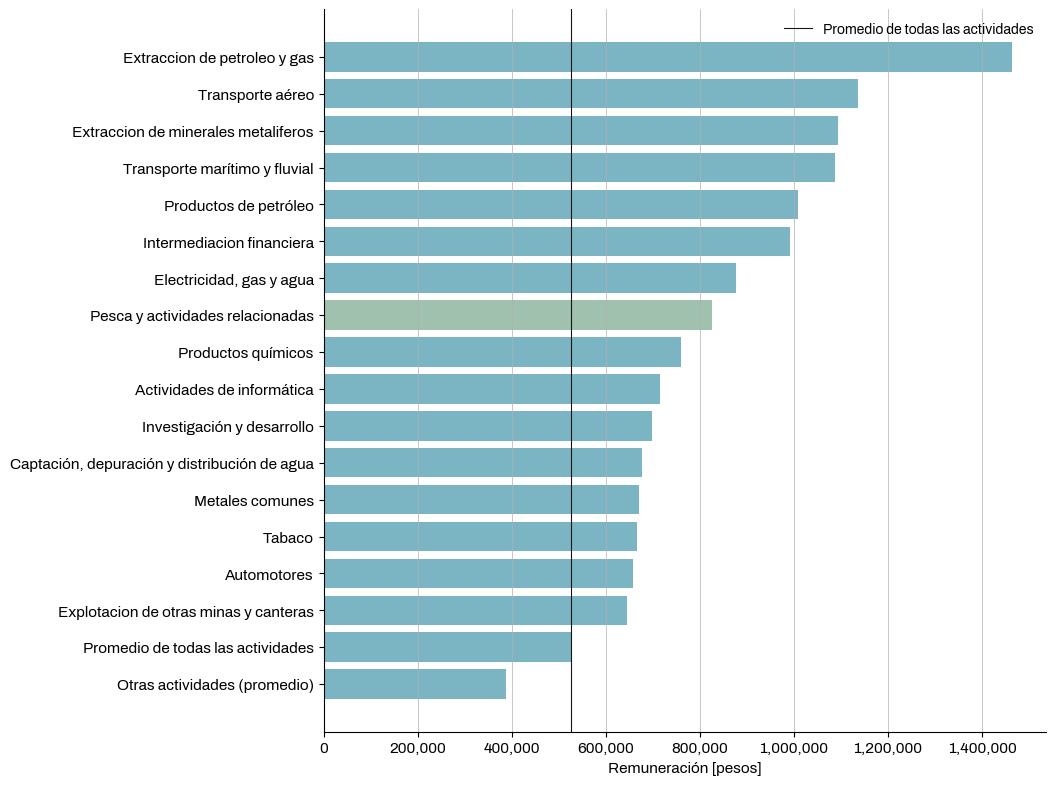

In [16]:
df_empleo_OEDE = df_empleo_OEDE.sort_values(by='Remuneración (pesos)')
x_data = df_empleo_OEDE['Rama de actividad']

y_data = df_empleo_OEDE['Remuneración (pesos)']

promedio = df_empleo_OEDE[df_empleo_OEDE['Rama de actividad'] == 'Promedio de todas las actividades']['Remuneración (pesos)'].values[0]


colors = [fundar_colores_primarios[1] if rama == 'Pesca y actividades relacionadas' else fundar_colores_primarios[0] for rama in df_empleo_OEDE['Rama de actividad']]

fig06 = plt.figure(figsize=(8.5, 8.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.barh(x_data, y_data, color=colors)

ax.axvline(promedio, color=fundar_black, linestyle='-', label='Promedio de todas las actividades', lw=0.8)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.grid(axis='x', lw=0.5)

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.tick_params(labelsize=11)
ax.set_xlabel('Remuneración [pesos]', fontsize=11)

ax.legend(frameon=False)
fig06.savefig('../figs/' + sheet_names[9] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig06.savefig('../figs/' + sheet_names[9] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [17]:
sheet_names[10]

'g07_evolucion_desembarques_puer'

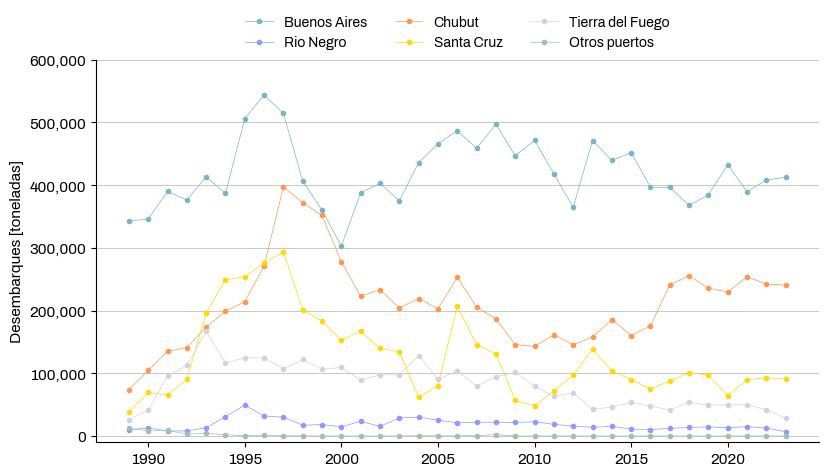

In [18]:
data = {
    'Año': list(range(1989, 2024)),
    'Buenos Aires': [342743.80, 346038.20, 390024.60, 376120.40, 413168.10, 386749.30, 506168.20, 544009.20, 
                     514327.70, 406626.00, 359970.30, 302877.60, 388178.80, 402961.30, 375162.50, 436052.20, 
                     465895.00, 487055.10, 458702.70, 497338.50, 446814.50, 471310.30, 418147.40, 364693.12, 
                     471264.33, 439448.33, 452014.13, 396749.32, 396358.64, 367702.40, 384639.77, 432521.57, 
                     389581.11, 408381.73, 412583.53],
    'Rio Negro': [9933.6, 12863.8, 7993.4, 8130.8, 13188.3, 30938.7, 49203.9, 32040.5, 29963.5, 17247.4, 
                  18180.3, 14849.8, 23295.5, 15402.8, 28684.0, 30292.5, 25110.9, 21206.0, 21866.1, 21869.0, 
                  21548.1, 22776.1, 18621.5, 15762.1, 14009.2, 15289.8, 11085.1, 10182.1, 12216.7, 13706.6, 
                  14580.9, 13124.1, 15121.9, 12579.0, 6738.1],
    'Chubut': [74002.7, 104690.9, 135060.0, 140853.2, 173816.0, 198952.0, 214286.1, 270759.6, 397309.7, 
               372276.6, 351703.9, 277630.3, 222956.8, 233208.2, 204282.6, 219227.1, 202843.3, 252961.2, 
               205740.6, 186694.4, 145786.7, 142895.8, 161662.0, 145360.8, 158192.4, 185541.8, 160272.787, 
               175621.2, 241045.4, 255677.5, 235639.2, 229974.4, 253973.8, 242075.639, 240724.151],
    'Santa Cruz': [38599.2, 69599.5, 65521.0, 90186.2, 195824.1, 249122.5, 253879.0, 276272.3, 293672.4, 
                   201636.6, 183072.1, 152618.4, 166817.1, 139982.6, 134303.4, 61995.5, 80185.0, 207131.8, 
                   145640.9, 130861.6, 56652.8, 47973.6, 72082.1, 97167.6, 138166.9, 103758.6, 90079.1, 
                   75206.8, 87843.7, 100877.6, 96840.5, 64469.7, 89672.1, 92996.2, 90911.9],
    'Tierra del Fuego': [25752.3, 41417.6, 96130.5, 112565.4, 167416.3, 116258.0, 124804.5, 124376.2, 
                         107418.5, 122015.1, 106414.1, 109331.2, 89299.9, 97433.6, 97684.4, 128205.2, 
                         90472.7, 103610.4, 79658.9, 94333.5, 101575.5, 79693.7, 63171.9, 69215.367, 
                         42496.6, 46250.7, 53625.53, 47964.9, 41496.33, 53691.7, 49524.365, 49666.608, 
                         49645.07, 41861.216, 28738.406],
    'Otros puertos': [12108.2, 8316.1, 8874.9, 3152.9, 4053.3, 2293.2, 310.4, 1332.6, 371.1, 350.2, 
                      0, 0, 1.1, 5.7, 0, 446.1, 264.5, 240.1, 611.8, 2250.9, 0, 7.5, 0, 7.5, 
                      15.8, 3.6, 0, 0.7, 0, 0, 0, 0, 58.7, 0, 0]
}

df = pd.DataFrame(data)

fig07 = plt.figure(figsize=(8.5,4.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])

ax.plot(df['Año'], df['Buenos Aires'], color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, label='Buenos Aires')
ax.plot(df['Año'], df['Rio Negro'], color=fundar_colores_primarios[3], marker='o', ms=3, lw=0.5, label='Rio Negro')
ax.plot(df['Año'], df['Chubut'], color=fundar_colores_primarios[4], marker='o', ms=3, lw=0.5, label='Chubut')
ax.plot(df['Año'], df['Santa Cruz'], color=fundar_colores_primarios[5], marker='o', ms=3, lw=0.5, label='Santa Cruz')
ax.plot(df['Año'], df['Tierra del Fuego'], color=fundar_colores_primarios[2], marker='o', ms=3, lw=0.5, label='Tierra del Fuego')
ax.plot(df['Año'], df['Otros puertos'], color=fundar_colores_primarios[1], marker='o', ms=3, lw=0.5, label='Otros puertos')

# Estética del gráfico
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y', lw=0.5)
ax.tick_params(labelsize=11)
ax.set_ylabel('Desembarques [toneladas]', fontsize=11)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, ncol=3)

ax.set_ylim([-10000, 600000]);
fig07.savefig('../figs/' + sheet_names[10] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig07.savefig('../figs/' + sheet_names[10] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [19]:
df_capturas_totales = pd.read_excel(file_path, sheet_name=sheet_names[11])
sheet_names[11]

'g08_evolucion_capturas_marinas_'

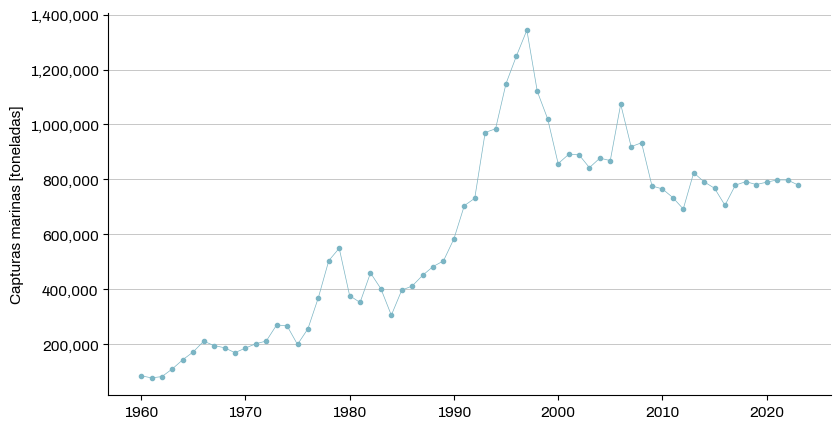

In [20]:
y_data = df_capturas_totales['Capturas marinas']

x_data = df_capturas_totales['Año']

fig08 = plt.figure(figsize=(8.5,4.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.plot(x_data, y_data, color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, label='Acuicultura')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y',
        lw=0.5)

ax.tick_params(labelsize=11)
ax.set_ylabel('Capturas marinas [toneladas]', fontsize=11);

fig08.savefig('../figs/' + sheet_names[11] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig08.savefig('../figs/' + sheet_names[11] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [21]:
df_capturas_totales = pd.read_excel(file_path, sheet_name=sheet_names[12])
sheet_names[12]

'g09_capturas_maximas_permisible'

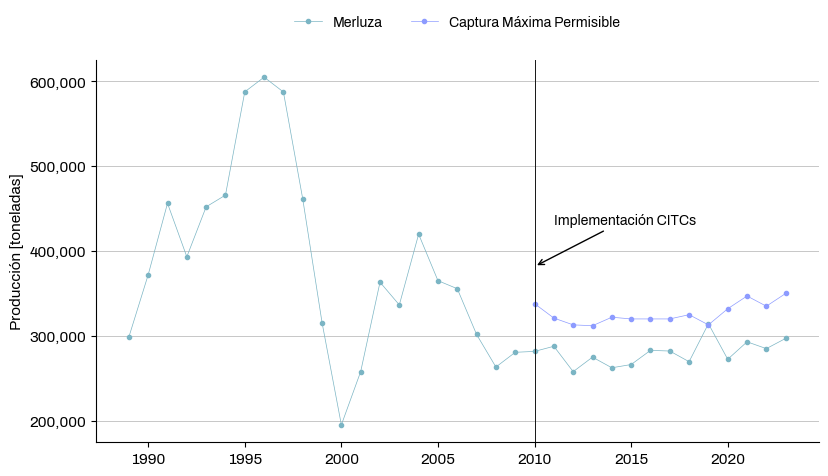

In [22]:
data = {
    'Año': list(range(1989, 2024)),
    'Merluza': [298683.7, 371975.9, 456203.3, 393208.5, 452039.7, 465846.7, 587488.7, 604804.8, 587347.6, 461390.3, 
                315652.7, 195171.4, 257982.4, 363275.4, 336512.8, 419825.5, 365064.7, 355617.6, 301690.8, 263322.6, 
                280677.5, 281752.1, 287780.3, 257883.4, 274981.8, 262459.5, 266274.0, 282953.7, 282187.3, 269610.8, 
                314325.9, 272465.0, 293028.7, 285014.2, 297070.8],
    'CMP total': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 
                  None, None, None, None, None, 338000, 321000, 313000, 312000, 322000, 320000, 320000, 320000, 
                  325000, 313000, 332000, 347000, 335000, 350000]
}

df = pd.DataFrame(data)

fig09 = plt.figure(figsize=(8.5,4.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])

ax.plot(df['Año'], df['Merluza'], color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, label='Merluza')
ax.plot(df['Año'], df['CMP total'], color=fundar_colores_primarios[3], marker='o', ms=3, lw=0.5, label='Captura Máxima Permisible')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y', lw=0.5)
ax.tick_params(labelsize=11)
ax.set_ylabel('Producción [toneladas]', fontsize=11)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, ncol=2)

ax.axvline(x=2010, color=fundar_black, linestyle='-', lw=0.7)

# Añadir una anotación en 2010
ax.annotate('Implementación CITCs', xy=(2010, df['Merluza'][df['Año'] == 2010].values[0]+100000), 
            xytext=(2011, df['Merluza'][df['Año'] == 2010].values[0] + 150000),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10)
fig09.savefig('../figs/' + sheet_names[12] + '.png', dpi=400, bbox_inches='tight', transparent=True)
fig09.savefig('../figs/' + sheet_names[12] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [23]:
df_desembarques = pd.read_excel(file_path, sheet_name=sheet_names[13])
sheet_names[13]

'g10_evolucion_desembarques_por_'

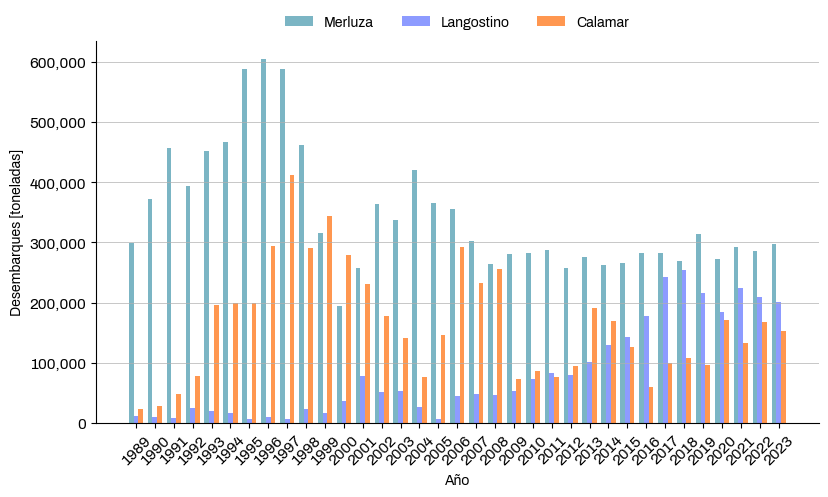

In [8]:

data = {
    'Año': list(range(1989, 2024)),
    'Merluza': [298683.7, 371975.9, 456203.3, 393208.5, 452039.7, 465846.7, 587488.7, 604804.8, 587347.6, 461390.3, 
                315652.7, 195171.4, 257982.4, 363275.4, 336512.8, 419825.5, 365064.7, 355617.6, 301690.8, 263322.6, 
                280677.5, 281752.1, 287780.3, 257883.4, 274981.8, 262459.5, 266274.0, 282953.7, 282187.3, 269610.8, 
                314325.9, 272465.0, 293028.7, 285014.2, 297070.8],
    'Langostino': [11353.0, 9629.3, 8521.5, 24495.5, 19270.9, 16669.7, 6208.0, 9874.5, 6481.9, 23333.2, 
                   15989.8, 37150.0, 78859.2, 51419.3, 52901.5, 27129.9, 7482.2, 44405.3, 47618.6, 47406.2, 
                   53693.0, 72938.0, 82921.9, 79926.9, 100670.5, 129093.6, 142796.2, 178454.4, 243161.7, 
                   254925.7, 215538.3, 183903.8, 223479.7, 209780.0, 200237.4],
    'Calamar': [23101.8, 28341.3, 47482.7, 78014.8, 195513.4, 198840.0, 199747.0, 294251.9, 411723.4, 291217.4, 
                343447.5, 279067.6, 230778.3, 177320.1, 141030.8, 76497.4, 146131.4, 292078.6, 233062.4, 
                255530.9, 72603.9, 85990.8, 76598.1, 94983.7, 191722.3, 168729.1, 126670.9, 59890.6, 
                99169.7, 108303.5, 96264.6, 171161.6, 132255.0, 167107.5, 153284.4]
}

df = pd.DataFrame(data)


fig10 = plt.figure(figsize=(8.5,4.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
# Definir el ancho de las barras y el desplazamiento para las diferentes categorías
bar_width = 0.25
x = np.arange(len(df['Año']))  # Valores del eje x (índices)

# Crear las barras para cada conjunto de datos
ax.bar(x, df['Merluza'], width=bar_width, label='Merluza', color=fundar_colores_primarios[0])
ax.bar(x + bar_width, df['Langostino'], width=bar_width, label='Langostino', color=fundar_colores_primarios[3])
ax.bar(x + 2 * bar_width, df['Calamar'], width=bar_width, label='Calamar', color=fundar_colores_primarios[4])

# Ajustar las etiquetas del eje x para que correspondan a los años
ax.set_xticks(x + bar_width)
ax.set_xticklabels(df['Año'], rotation=45)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y', lw=0.5)
ax.tick_params(labelsize=11)
ax.set_ylabel('Desembarcos [toneladas]')

# Añadir leyenda y etiquetas
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), frameon=False, ncol=3)
ax.set_xlabel('Año')
ax.set_ylabel('Desembarques [toneladas]')

fig10.savefig('../figs/' + sheet_names[13] + '.svg', bbox_inches='tight', transparent=True, format='svg')


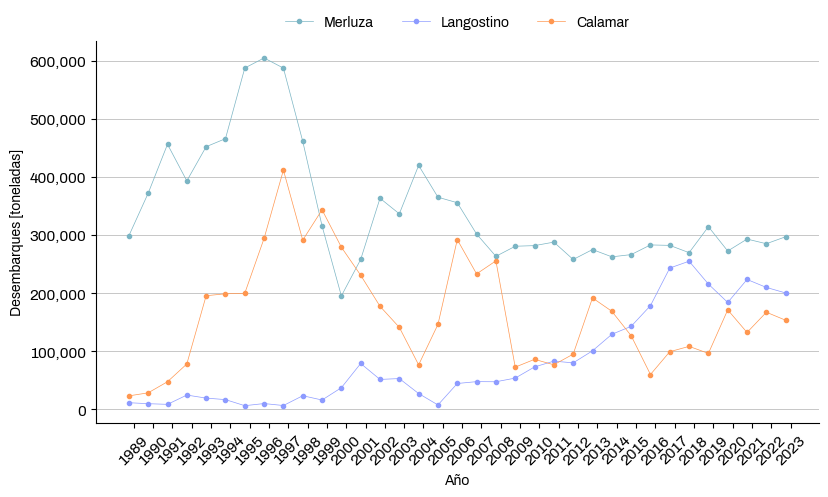

In [10]:

data = {
    'Año': list(range(1989, 2024)),
    'Merluza': [298683.7, 371975.9, 456203.3, 393208.5, 452039.7, 465846.7, 587488.7, 604804.8, 587347.6, 461390.3, 
                315652.7, 195171.4, 257982.4, 363275.4, 336512.8, 419825.5, 365064.7, 355617.6, 301690.8, 263322.6, 
                280677.5, 281752.1, 287780.3, 257883.4, 274981.8, 262459.5, 266274.0, 282953.7, 282187.3, 269610.8, 
                314325.9, 272465.0, 293028.7, 285014.2, 297070.8],
    'Langostino': [11353.0, 9629.3, 8521.5, 24495.5, 19270.9, 16669.7, 6208.0, 9874.5, 6481.9, 23333.2, 
                   15989.8, 37150.0, 78859.2, 51419.3, 52901.5, 27129.9, 7482.2, 44405.3, 47618.6, 47406.2, 
                   53693.0, 72938.0, 82921.9, 79926.9, 100670.5, 129093.6, 142796.2, 178454.4, 243161.7, 
                   254925.7, 215538.3, 183903.8, 223479.7, 209780.0, 200237.4],
    'Calamar': [23101.8, 28341.3, 47482.7, 78014.8, 195513.4, 198840.0, 199747.0, 294251.9, 411723.4, 291217.4, 
                343447.5, 279067.6, 230778.3, 177320.1, 141030.8, 76497.4, 146131.4, 292078.6, 233062.4, 
                255530.9, 72603.9, 85990.8, 76598.1, 94983.7, 191722.3, 168729.1, 126670.9, 59890.6, 
                99169.7, 108303.5, 96264.6, 171161.6, 132255.0, 167107.5, 153284.4]
}

df = pd.DataFrame(data)


fig10 = plt.figure(figsize=(8.5,4.5))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
# Definir el ancho de las barras y el desplazamiento para las diferentes categorías
bar_width = 0.25
x = np.arange(len(df['Año']))  # Valores del eje x (índices)

# Crear las barras para cada conjunto de datos
ax.plot(x, df['Merluza'], label='Merluza', color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, )
ax.plot(x, df['Langostino'], label='Langostino', color=fundar_colores_primarios[3], marker='o', ms=3, lw=0.5, )
ax.plot(x, df['Calamar'], label='Calamar', color=fundar_colores_primarios[4], marker='o', ms=3, lw=0.5, )

# Ajustar las etiquetas del eje x para que correspondan a los años
ax.set_xticks(x + bar_width)
ax.set_xticklabels(df['Año'], rotation=45)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y', lw=0.5)
ax.tick_params(labelsize=11)
ax.set_ylabel('Desembarcos [toneladas]')

# Añadir leyenda y etiquetas
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), frameon=False, ncol=3)
ax.set_xlabel('Año')
ax.set_ylabel('Desembarques [toneladas]')

fig10.savefig('../figs/' + sheet_names[13] + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [25]:
df_exportaciones = pd.read_excel(file_path, sheet_name=sheet_names[14])
sheet_names[14]

'g11_exportaciones_pesqueras_202'

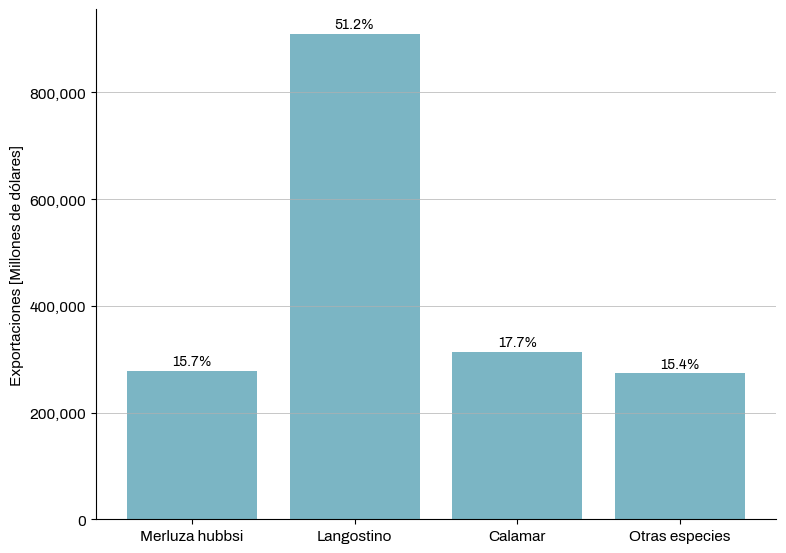

In [26]:
data = {
    'Unnamed: 0': ['Merluza hubbsi', 'Langostino', 'Calamar', 'Otras especies'],
    'Millones de dólares': [278462, 910327, 314373, 273838]
}

df = pd.DataFrame(data)

total = df['Millones de dólares'].sum()
df['Porcentaje'] = (df['Millones de dólares'] / total) * 100

# Datos para el gráfico
x_data = df['Unnamed: 0']
y_data = df['Millones de dólares']
percentages = df['Porcentaje']

fig11 = plt.figure(figsize=(8, 6))

ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.bar(x_data, y_data, color=fundar_colores_primarios[0])

# Etiquetas y estética
ax.set_xticks(range(len(x_data)))
ax.set_xticklabels(x_data, rotation=0, ha='center')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(axis='y', lw=0.5)

ax.tick_params(labelsize=11)
ax.set_ylabel('Exportaciones [Millones de dólares]', fontsize=11)

for i, v in enumerate(y_data):
    ax.text(i, v + 10000, f'{percentages.iloc[i]:.1f}%', ha='center', fontsize=10, color='black')

fig11.savefig('../figs/' + 'g11_desembarques_2023' + '.svg', bbox_inches='tight', transparent=True, format='svg')


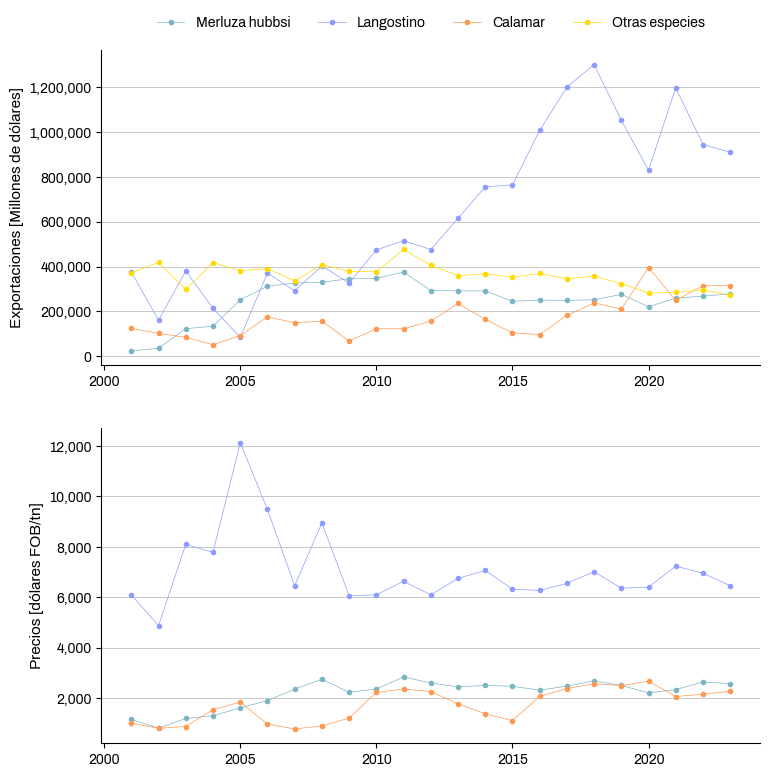

In [27]:
data_exportaciones = {
    'Año': list(range(2001, 2024)),
    'Merluza hubbsi': [23804, 35709, 123090, 134167, 252188, 311731, 326857, 330372, 345395, 347278, 375539, 293318, 291890, 291400, 245432, 250573, 249360, 252136, 276098, 221100, 258890, 268451, 278462],
    'Langostino': [375590, 161115, 380592, 213685, 84305, 371232, 291902, 402507, 326757, 474096, 515544, 476068, 615058, 755610, 763861, 1007435, 1200161, 1300470, 1052173, 829968, 1197234, 943673, 910327],
    'Calamar': [123967, 102552, 84302, 51623, 92353, 176360, 149391, 156985, 68055, 122663, 122701, 156576, 235423, 164694, 104528, 96715, 182403, 238148, 210360, 395846, 249005, 314783, 314373],
    'Otras especies': [371639, 418624, 298017, 417525, 382154, 389677, 335850, 409136, 378793, 376963, 476216, 406038, 359629, 368296, 352179, 369277, 346076, 357246, 324369, 282086, 284871, 296093, 272838]
}

data_peso = {
    'Año': list(range(2001, 2024)),
    'Merluza hubbsi': [1149, 805, 1189, 1296, 1612, 1896, 2355, 2746, 2225, 2361, 2834, 2600, 2440, 2502, 2464, 2313, 2470, 2684, 2499, 2205, 2334, 2639, 2571],
    'Langostino': [6090, 4874, 8100, 7777, 12135, 9482, 6454, 8948, 6059, 6096, 6630, 6096, 6748, 7060, 6321, 6267, 6548, 7013, 6359, 6396, 7234, 6950, 6457],
    'Calamar': [1003, 799, 868, 1540, 1842, 963, 772, 889, 1203, 2221, 2357, 2255, 1769, 1375, 1101, 2065, 2376, 2571, 2492, 2670, 2060, 2147, 2264]
}

df_exportaciones = pd.DataFrame(data_exportaciones)
df_peso = pd.DataFrame(data_peso)

# Crear la figura con dos subplots
fig12, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.5, 9))

# Primer gráfico: exportaciones pesqueras
ax1.plot(df_exportaciones['Año'], df_exportaciones['Merluza hubbsi'], color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, label='Merluza hubbsi')
ax1.plot(df_exportaciones['Año'], df_exportaciones['Langostino'], color=fundar_colores_primarios[3], marker='o', ms=3, lw=0.5, label='Langostino')
ax1.plot(df_exportaciones['Año'], df_exportaciones['Calamar'], color=fundar_colores_primarios[4], marker='o', ms=3, lw=0.5, label='Calamar')
ax1.plot(df_exportaciones['Año'], df_exportaciones['Otras especies'], color=fundar_colores_primarios[5], marker='o', ms=3, lw=0.5, label='Otras especies')
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.grid(axis='y', lw=0.5)
ax1.set_ylabel('Exportaciones [Millones de dólares]', fontsize=11)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, ncol=4)

# Segundo gráfico: pesos de las especies
ax2.plot(df_peso['Año'], df_peso['Merluza hubbsi'], color=fundar_colores_primarios[0], marker='o', ms=3, lw=0.5, label='Merluza hubbsi')
ax2.plot(df_peso['Año'], df_peso['Langostino'], color=fundar_colores_primarios[3], marker='o', ms=3, lw=0.5, label='Langostino')
ax2.plot(df_peso['Año'], df_peso['Calamar'], color=fundar_colores_primarios[4], marker='o', ms=3, lw=0.5, label='Calamar')
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Estética del gráfico 2
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.grid(axis='y', lw=0.5)
ax2.set_ylabel('Precios [dólares FOB/tn]', fontsize=11)

fig12.savefig('../figs/' + 'g12_exportaciones_evolucion' + '.svg', bbox_inches='tight', transparent=True, format='svg')



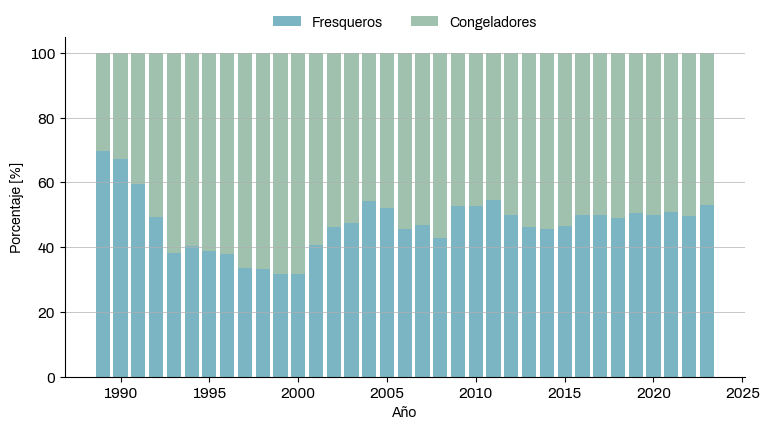

In [28]:

data = {
    'Año': list(range(1989, 2024)),
    'Subtotal fresqueros': [350616, 392665.3, 418732.6, 359556.9, 369516.7, 398674, 447331.7, 472549.9, 450345.1, 372181.4,
                            322286.4, 272636.4, 361360.2, 410276.6, 399532.3, 476861.3, 453031, 488809.8, 430654.2, 400576.7,
                            408135.4, 402154.2, 399687.3, 344683.52, 381734.69, 360981.49, 357537.44, 351833, 388685.47,
                            387752.76, 395669.45, 393996.05, 406084.01, 396159.96, 413490.42],
    'Subtotal congeladores': [152694.5, 190626.5, 285647.9, 371655.5, 601110.5, 585639.7, 701346.8, 777095, 892874.4, 747970.5,
                              697450.3, 584732.5, 529408.3, 479388, 443190.2, 400529.3, 415337.9, 584944.9, 488505.2, 532771.5,
                              364345, 362502.8, 334179.4, 347579, 442410.4, 430158.3, 410171, 353891.9, 390275.3, 403903.1,
                              385557.2, 395760.4, 391968.6, 401733.8, 366205.6]
}

df_fresqueros_congeladores = pd.DataFrame(data)

df_fresqueros_congeladores['Total'] = df_fresqueros_congeladores['Subtotal fresqueros'] + df_fresqueros_congeladores['Subtotal congeladores']
df_fresqueros_congeladores['Fresqueros %'] = (df_fresqueros_congeladores['Subtotal fresqueros'] / df_fresqueros_congeladores['Total']) * 100
df_fresqueros_congeladores['Congeladores %'] = (df_fresqueros_congeladores['Subtotal congeladores'] / df_fresqueros_congeladores['Total']) * 100

fig13 = plt.figure(figsize=(8, 4))
ax1 = plt.axes([0.05, 0.05, 0.85, 0.85])

ax1.bar(df_fresqueros_congeladores['Año'], df_fresqueros_congeladores['Fresqueros %'], label='Fresqueros', color=fundar_colores_primarios[0])
ax1.bar(df_fresqueros_congeladores['Año'], df_fresqueros_congeladores['Congeladores %'], bottom=df_fresqueros_congeladores['Fresqueros %'], label='Congeladores', color=fundar_colores_primarios[1])

ax1.set_ylabel('Porcentaje [%]')
ax1.set_xlabel('Año')
ax1.grid(axis='y', lw=0.5)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), frameon=False, ncol=2)
ax1.tick_params(labelsize=11)

fig13.savefig('../figs/' + 'g13_desembarques_conservacion' + '.svg', bbox_inches='tight', transparent=True, format='svg')


In [29]:
df_artes = pd.read_excel(file_path, sheet_name=sheet_names[17], skiprows=1)
sheet_names[17]

'g14_evolucion_desembarques_segu'

In [30]:
df_artes_cong = df_artes[['Año', 'Arrastreros', 'Palangreros', 'Tangoneros', 'Surimeros', 'Poteros totales', 'Tramperos', 'Otras artes', 'Subtotal congeladores']] 

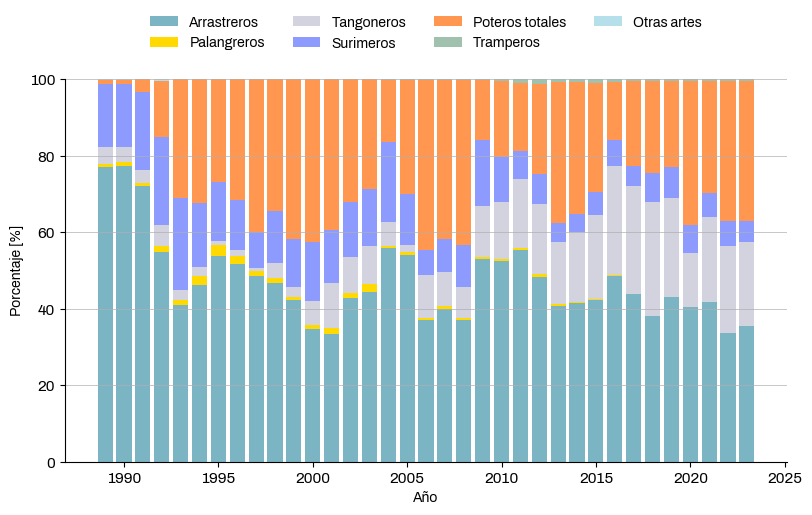

In [31]:

# Calcular los porcentajes por fila
for col in ['Arrastreros', 'Palangreros', 'Tangoneros', 'Surimeros', 'Poteros totales', 'Tramperos', 'Otras artes']:
    df_artes_cong[f'{col} %'] = (df_artes_cong[col] / df_artes_cong['Subtotal congeladores']) * 100

fig14 = plt.figure(figsize=(8.5, 4.5))
ax2 = plt.axes([0.05, 0.05, 0.85, 0.85])

# Graficar las barras apiladas para las artes con los colores de Fundar
ax2.bar(df_artes_cong['Año'], df_artes_cong['Arrastreros %'], label='Arrastreros', color=fundar_colores_primarios[0])
ax2.bar(df_artes_cong['Año'], df_artes_cong['Palangreros %'], bottom=df_artes_cong['Arrastreros %'], label='Palangreros', color=fundar_colores_primarios[5])
ax2.bar(df_artes_cong['Año'], df_artes_cong['Tangoneros %'], bottom=df_artes_cong['Arrastreros %'] + df_artes_cong['Palangreros %'], label='Tangoneros', color=fundar_colores_primarios[2])
ax2.bar(df_artes_cong['Año'], df_artes_cong['Surimeros %'], bottom=df_artes_cong['Arrastreros %'] + df_artes_cong['Palangreros %'] + df_artes_cong['Tangoneros %'], label='Surimeros', color=fundar_colores_primarios[3])
ax2.bar(df_artes_cong['Año'], df_artes_cong['Poteros totales %'], bottom=df_artes_cong['Arrastreros %'] + df_artes_cong['Palangreros %'] + df_artes_cong['Tangoneros %'] + df_artes_cong['Surimeros %'], label='Poteros totales', color=fundar_colores_primarios[4])
ax2.bar(df_artes_cong['Año'], df_artes_cong['Tramperos %'], bottom=df_artes_cong['Arrastreros %'] + df_artes_cong['Palangreros %'] + df_artes_cong['Tangoneros %'] + df_artes_cong['Surimeros %'] + df_artes_cong['Poteros totales %'], label='Tramperos', color=fundar_colores_primarios[1])
ax2.bar(df_artes_cong['Año'], df_artes_cong['Otras artes %'], bottom=df_artes_cong['Arrastreros %'] + df_artes_cong['Palangreros %'] + df_artes_cong['Tangoneros %'] + df_artes_cong['Surimeros %'] + df_artes_cong['Poteros totales %'] + df_artes_cong['Tramperos %'], label='Otras artes', color=fundar_colores_secundarios[0])

ax2.set_ylabel('Porcentaje [%]')
ax2.set_xlabel('Año')
ax2.grid(axis='y', lw=0.5)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=False, ncol=4)
ax2.tick_params(labelsize=11)

fig14.savefig('../figs/' + 'g14_desembarques_arte_de_pesca' + '.svg', bbox_inches='tight', transparent=True, format='svg')

